<a href="https://colab.research.google.com/github/maulindu8322/tensorflow/blob/master/tf_project1.1_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
   if(logs.get('accuracy')>0.95):
     print("\nReached 95% accuracy so cancelling training!")
     self.model.stop_training = True

In [5]:
mnist = tf.keras.datasets.fashion_mnist

(train_image, train_labels), (test_image, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(train_image[0])

In [0]:
train_image = train_image/255.0
test_image = test_image/255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
callbacks = myCallback()

In [0]:
model.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(train_image, train_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4994 - accuracy: 0.8247
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8642
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8950
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.8990
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - accuracy: 0.9024
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9066
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [13]:
model.evaluate(test_image, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8912


[0.3438032269477844, 0.8912000060081482]

6


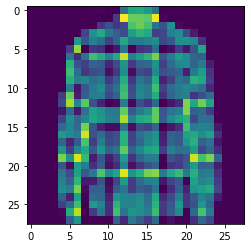

In [14]:
classification = model.predict(test_image)
c = np.argmax(classification[7])
print(c)
plt.imshow(test_image[7])

In [15]:
print(test_labels[7])

6
